# Results of UNET Data Set 10.001 Super-Resolution Experiments

Importing packages:

In [1]:
from PIL import Image, ImageStat
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from scipy.ndimage.filters import gaussian_filter
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import glob 
import random
import numpy as np
import os
import re
import cv2
import argparse
import pandas as pd
import math
import torch  
import torch.nn.functional as F 

Create the data sets with results:

In [2]:
# validation set for all 5 n-folds

# PSNR
val_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_psnr_0.csv')
val_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_psnr_1.csv')
val_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_psnr_2.csv')
val_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_psnr_3.csv')
val_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_psnr_4.csv')

# SSIM
val_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_ssim_0.csv')
val_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_ssim_1.csv')
val_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_ssim_2.csv')
val_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_ssim_3.csv')
val_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_ssim_4.csv')

# SSSIM
val_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_sssim_0.csv')
val_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_sssim_1.csv')
val_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_sssim_2.csv')
val_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_sssim_3.csv')
val_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/val_results_sssim_4.csv')


In [3]:
# crop the data frames
val_results_psnr_0 = val_results_psnr_0.iloc[:100,1:11]
val_results_psnr_1 = val_results_psnr_1.iloc[:100,1:11]
val_results_psnr_2 = val_results_psnr_2.iloc[:100,1:11]
val_results_psnr_3 = val_results_psnr_3.iloc[:100,1:11]
val_results_psnr_4 = val_results_psnr_4.iloc[:100,1:11]

val_results_ssim_0 = val_results_ssim_0.iloc[:100,1:11]
val_results_ssim_1 = val_results_ssim_1.iloc[:100,1:11]
val_results_ssim_2 = val_results_ssim_2.iloc[:100,1:11]
val_results_ssim_3 = val_results_ssim_3.iloc[:100,1:11]
val_results_ssim_4 = val_results_ssim_4.iloc[:100,1:11]

val_results_sssim_0 = val_results_sssim_0.iloc[:100,1:11]
val_results_sssim_1 = val_results_sssim_1.iloc[:100,1:11]
val_results_sssim_2 = val_results_sssim_2.iloc[:100,1:11]
val_results_sssim_3 = val_results_sssim_3.iloc[:100,1:11]
val_results_sssim_4 = val_results_sssim_4.iloc[:100,1:11]

In [4]:
# test set for all folds

# PSNR
test_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_psnr_0.csv')
test_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_psnr_1.csv')
test_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_psnr_2.csv')
test_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_psnr_3.csv')
test_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_psnr_4.csv')

# SSIM
test_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_ssim_0.csv')
test_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_ssim_1.csv')
test_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_ssim_2.csv')
test_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_ssim_3.csv')
test_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_ssim_4.csv')

# SSSIM 
test_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_sssim_0.csv')
test_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_sssim_1.csv')
test_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_sssim_2.csv')
test_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_sssim_3.csv')
test_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/test_results_sssim_4.csv')


In [5]:
# crop the data frames
test_results_psnr_0 = test_results_psnr_0.iloc[:251,1:11]
test_results_psnr_1 = test_results_psnr_1.iloc[:251,1:11]
test_results_psnr_2 = test_results_psnr_2.iloc[:251,1:11]
test_results_psnr_3 = test_results_psnr_3.iloc[:251,1:11]
test_results_psnr_4 = test_results_psnr_4.iloc[:251,1:11]

test_results_ssim_0 = test_results_ssim_0.iloc[:251,1:11]
test_results_ssim_1 = test_results_ssim_1.iloc[:251,1:11]
test_results_ssim_2 = test_results_ssim_2.iloc[:251,1:11]
test_results_ssim_3 = test_results_ssim_3.iloc[:251,1:11]
test_results_ssim_4 = test_results_ssim_4.iloc[:251,1:11]

test_results_sssim_0 = test_results_sssim_0.iloc[:251,1:11]
test_results_sssim_1 = test_results_sssim_1.iloc[:251,1:11]
test_results_sssim_2 = test_results_sssim_2.iloc[:251,1:11]
test_results_sssim_3 = test_results_sssim_3.iloc[:251,1:11]
test_results_sssim_4 = test_results_sssim_4.iloc[:251,1:11]

In [6]:
# train set for all folds

# PSNR
train_results_psnr_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_psnr_0.csv')
train_results_psnr_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_psnr_1.csv')
train_results_psnr_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_psnr_2.csv')
train_results_psnr_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_psnr_3.csv')
train_results_psnr_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_psnr_4.csv')

# SSIM
train_results_ssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_ssim_0.csv')
train_results_ssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_ssim_1.csv')
train_results_ssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_ssim_2.csv')
train_results_ssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_ssim_3.csv')
train_results_ssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_ssim_4.csv')

# SSSIM
train_results_sssim_0 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_sssim_0.csv')
train_results_sssim_1 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_sssim_1.csv')
train_results_sssim_2 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_sssim_2.csv')
train_results_sssim_3 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_sssim_3.csv')
train_results_sssim_4 = pd.read_csv('/home/julia/understanding-unets-master/experiments/results_10/train_results_sssim_4.csv')


In [7]:
# crop the data frames
train_results_psnr_0 = train_results_psnr_0.iloc[:901,1:11]
train_results_psnr_1 = train_results_psnr_1.iloc[:901,1:11]
train_results_psnr_2 = train_results_psnr_2.iloc[:901,1:11]
train_results_psnr_3 = train_results_psnr_3.iloc[:901,1:11]
train_results_psnr_4 = train_results_psnr_4.iloc[:901,1:11]

train_results_ssim_0 = train_results_ssim_0.iloc[:901,1:11]
train_results_ssim_1 = train_results_ssim_1.iloc[:901,1:11]
train_results_ssim_2 = train_results_ssim_2.iloc[:901,1:11]
train_results_ssim_3 = train_results_ssim_3.iloc[:901,1:11]
train_results_ssim_4 = train_results_ssim_4.iloc[:901,1:11]

train_results_sssim_0 = train_results_sssim_0.iloc[:901,1:11]
train_results_sssim_1 = train_results_sssim_1.iloc[:901,1:11]
train_results_sssim_2 = train_results_sssim_2.iloc[:901,1:11]
train_results_sssim_3 = train_results_sssim_3.iloc[:901,1:11]
train_results_sssim_4 = train_results_sssim_4.iloc[:901,1:11]

## Visualize Validation data sets

### SSIM / SSSIM Scores for all n-folds separately

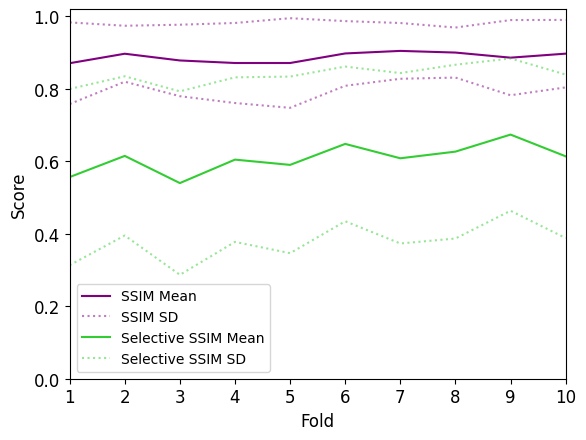

In [9]:
ssim_means = val_results_ssim_0.mean()
ssim_stds = val_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_0.mean()
sssim_stds = val_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_val_0.png")

In [10]:
print(ssim_means,ssim_stds)

0    0.870732
1    0.896902
2    0.878319
3    0.871308
4    0.871291
5    0.897671
6    0.904711
7    0.900115
8    0.886044
9    0.897108
dtype: float64 0    0.112613
1    0.077198
2    0.098653
3    0.110437
4    0.123668
5    0.089259
6    0.076951
7    0.069049
8    0.103726
9    0.093145
dtype: float64


In [11]:
print(sssim_means,sssim_stds)

0    0.556503
1    0.614930
2    0.539934
3    0.604663
4    0.590151
5    0.648026
6    0.608377
7    0.626721
8    0.673748
9    0.613803
dtype: float64 0    0.243160
1    0.219730
2    0.253135
3    0.227069
4    0.243667
5    0.213453
6    0.235159
7    0.239780
8    0.210131
9    0.225618
dtype: float64


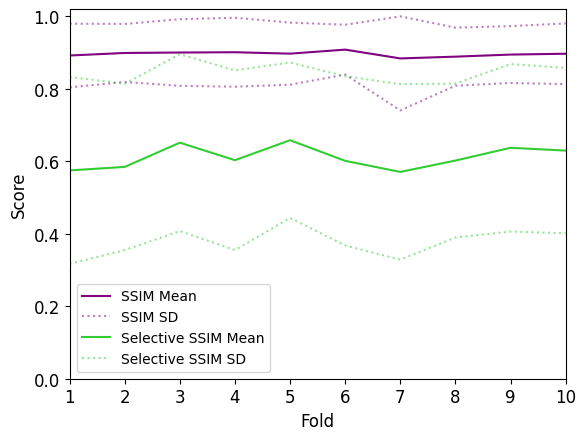

In [13]:
ssim_means = val_results_ssim_1.mean()
ssim_stds = val_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_1.mean()
sssim_stds = val_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_val_1.png")

In [14]:
print(ssim_means,ssim_stds)

0    0.891996
1    0.899011
2    0.900223
3    0.901041
4    0.897123
5    0.908224
6    0.883937
7    0.888799
8    0.894603
9    0.896861
dtype: float64 0    0.087862
1    0.080031
2    0.091927
3    0.095123
4    0.085696
5    0.068738
6    0.143404
7    0.080061
8    0.078493
9    0.083702
dtype: float64


In [15]:
print(sssim_means,ssim_stds)

0    0.574881
1    0.584570
2    0.651433
3    0.603092
4    0.658195
5    0.601281
6    0.570681
7    0.602068
8    0.637275
9    0.629606
dtype: float64 0    0.087862
1    0.080031
2    0.091927
3    0.095123
4    0.085696
5    0.068738
6    0.143404
7    0.080061
8    0.078493
9    0.083702
dtype: float64


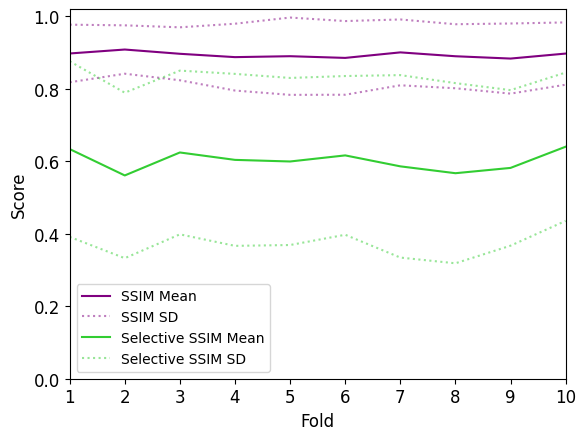

In [16]:
ssim_means = val_results_ssim_2.mean()
ssim_stds = val_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_2.mean()
sssim_stds = val_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_val_2.png")

In [17]:
print(ssim_means,ssim_stds)

0    0.897581
1    0.908485
2    0.896727
3    0.887511
4    0.890061
5    0.885379
6    0.900620
7    0.889948
8    0.883560
9    0.897352
dtype: float64 0    0.079494
1    0.066767
2    0.073061
3    0.092210
4    0.106668
5    0.101660
6    0.090833
7    0.088361
8    0.096761
9    0.085956
dtype: float64


In [18]:
print(sssim_means,sssim_stds )

0    0.633801
1    0.561007
2    0.624380
3    0.603959
4    0.599524
5    0.616323
6    0.586095
7    0.567168
8    0.581794
9    0.640311
dtype: float64 0    0.242380
1    0.228354
2    0.225923
3    0.237305
4    0.230539
5    0.219027
6    0.251775
7    0.248603
8    0.214634
9    0.204663
dtype: float64


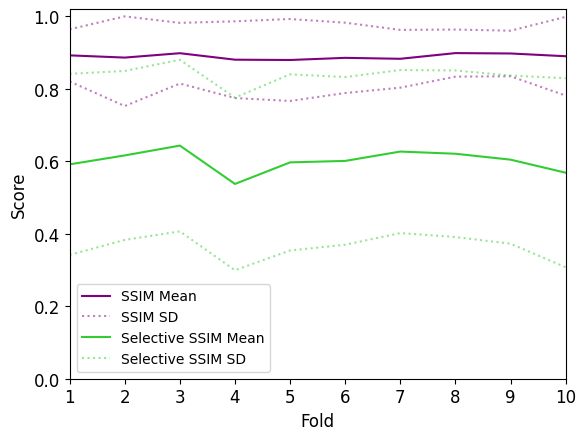

In [20]:
ssim_means = val_results_ssim_3.mean()
ssim_stds = val_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_3.mean()
sssim_stds = val_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_val_3.png")

In [21]:
print(ssim_means, ssim_stds)

0    0.892370
1    0.886266
2    0.898337
3    0.880449
4    0.879614
5    0.885525
6    0.882939
7    0.898643
8    0.897599
9    0.889991
dtype: float64 0    0.071932
1    0.133800
2    0.083675
3    0.105896
4    0.113051
5    0.097043
6    0.079732
7    0.065010
8    0.062877
9    0.108592
dtype: float64


In [22]:
print(sssim_means, sssim_stds )

0    0.591615
1    0.616256
2    0.643380
3    0.537531
4    0.597050
5    0.601110
6    0.626915
7    0.620868
8    0.604571
9    0.568560
dtype: float64 0    0.249724
1    0.233131
2    0.236749
3    0.238130
4    0.243064
5    0.231358
6    0.225002
7    0.229901
8    0.231960
9    0.260937
dtype: float64


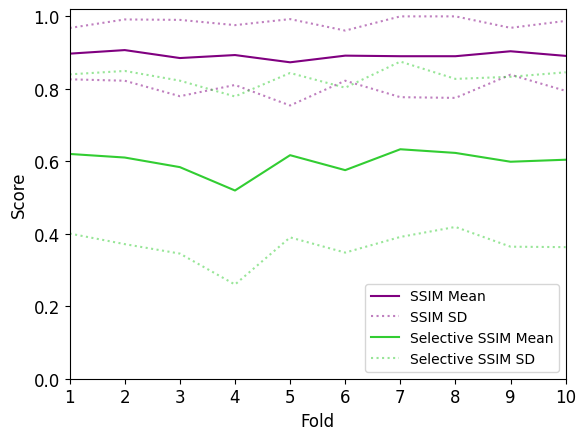

In [23]:
ssim_means = val_results_ssim_4.mean()
ssim_stds = val_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = val_results_sssim_4.mean()
sssim_stds = val_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_val_4.png")

In [24]:
print(ssim_means, ssim_stds)

0    0.897116
1    0.906945
2    0.884985
3    0.893258
4    0.873246
5    0.891622
6    0.890042
7    0.890033
8    0.903716
9    0.890940
dtype: float64 0    0.070828
1    0.084557
2    0.105308
3    0.082592
4    0.119180
5    0.069144
6    0.113048
7    0.114996
8    0.064645
9    0.096504
dtype: float64


In [25]:
print(sssim_means,sssim_stds )

0    0.620311
1    0.610404
2    0.583931
3    0.519443
4    0.616908
5    0.575615
6    0.633267
7    0.623155
8    0.598827
9    0.604387
dtype: float64 0    0.219658
1    0.238973
2    0.238623
3    0.259474
4    0.226857
5    0.227524
6    0.241950
7    0.204290
8    0.234452
9    0.241243
dtype: float64


### PSNR results for all n-folds separately

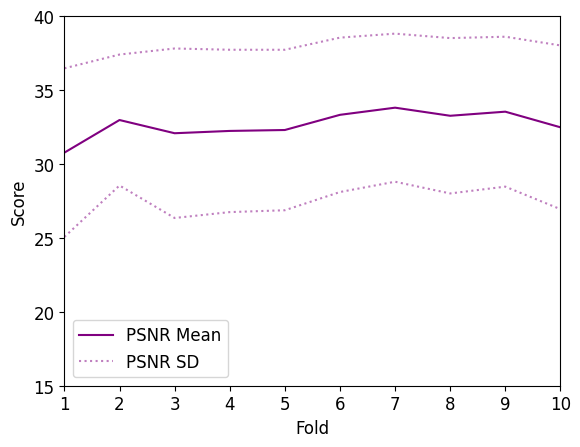

In [26]:
psnr_means = val_results_psnr_0.mean()
psnr_stds = val_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10/psnr_val_0.png")

In [27]:
print(psnr_means, psnr_stds)

0    30.767546
1    32.972091
2    32.078399
3    32.234577
4    32.296693
5    33.323342
6    33.806965
7    33.259791
8    33.536663
9    32.480482
dtype: float64 0    5.703364
1    4.428977
2    5.732224
3    5.490536
4    5.427447
5    5.221367
6    5.008351
7    5.253861
8    5.070190
9    5.537621
dtype: float64


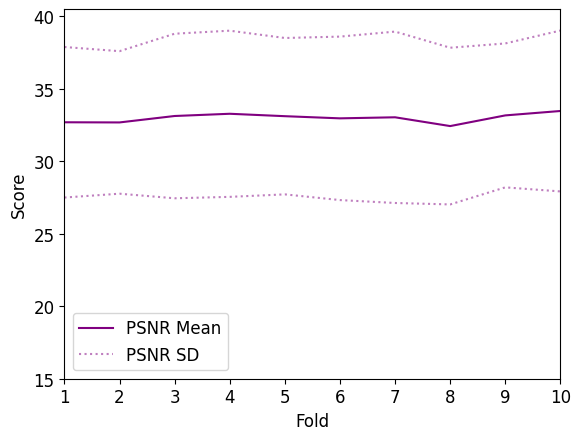

In [28]:
psnr_means = val_results_psnr_1.mean()
psnr_stds = val_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40.5)
plt.savefig("unet_results_10/psnr_val_1.png")

In [29]:
print(psnr_means, psnr_stds)

0    32.693297
1    32.682290
2    33.126016
3    33.280058
4    33.113440
5    32.964435
6    33.037128
7    32.430797
8    33.167511
9    33.471450
dtype: float64 0    5.192626
1    4.916499
2    5.676901
3    5.732857
4    5.394547
5    5.639218
6    5.912215
7    5.405506
8    4.964448
9    5.549712
dtype: float64


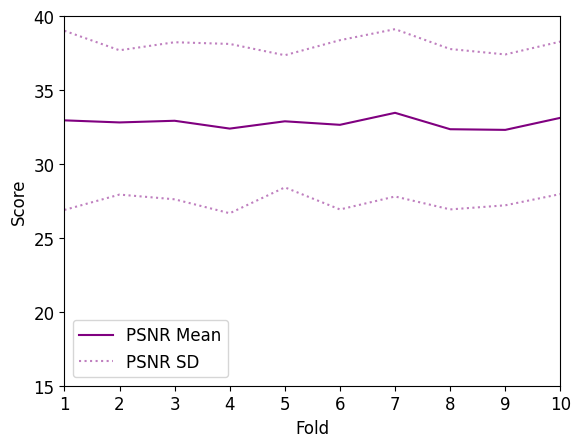

In [30]:
psnr_means = val_results_psnr_2.mean()
psnr_stds = val_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10/psnr_val_2.png")

In [31]:
print(psnr_means, psnr_stds)

0    32.949645
1    32.809151
2    32.921746
3    32.392103
4    32.885534
5    32.647824
6    33.459125
7    32.349479
8    32.305842
9    33.120420
dtype: float64 0    6.059730
1    4.880193
2    5.311921
3    5.726398
4    4.469099
5    5.725077
6    5.659405
7    5.423968
8    5.102320
9    5.156669
dtype: float64


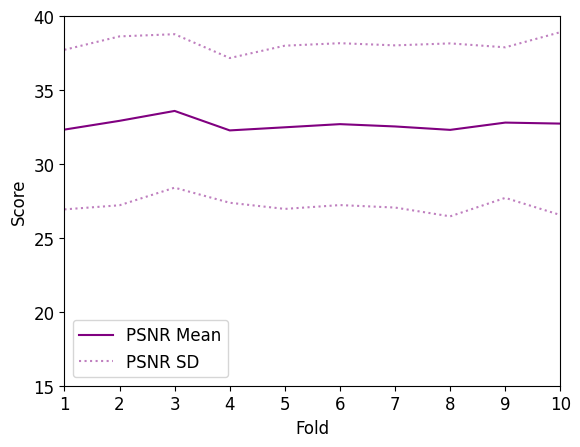

In [32]:
psnr_means = val_results_psnr_3.mean()
psnr_stds = val_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10/psnr_val_3.png")

In [33]:
print(psnr_means, psnr_stds)

0    32.324360
1    32.917709
2    33.587016
3    32.269789
4    32.479895
5    32.693450
6    32.536684
7    32.306021
8    32.798144
9    32.730506
dtype: float64 0    5.397201
1    5.711838
2    5.190047
3    4.893991
4    5.520327
5    5.474782
6    5.485105
7    5.849180
8    5.091168
9    6.184427
dtype: float64


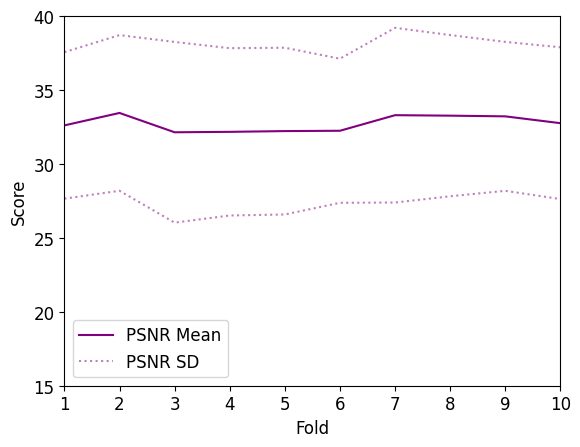

In [34]:
psnr_means = val_results_psnr_4.mean()
psnr_stds = val_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10/psnr_val_4.png")

In [35]:
print(psnr_means, psnr_stds)

0    32.609151
1    33.450411
2    32.142994
3    32.172416
4    32.223613
5    32.245715
6    33.299913
7    33.267236
8    33.220321
9    32.758957
dtype: float64 0    4.954855
1    5.265298
2    6.111173
3    5.658139
4    5.639983
5    4.874066
6    5.908015
7    5.453278
8    5.036790
9    5.134851
dtype: float64


## Visualize Test Set

### SSIM / SSSIM Comparison for each n-fold

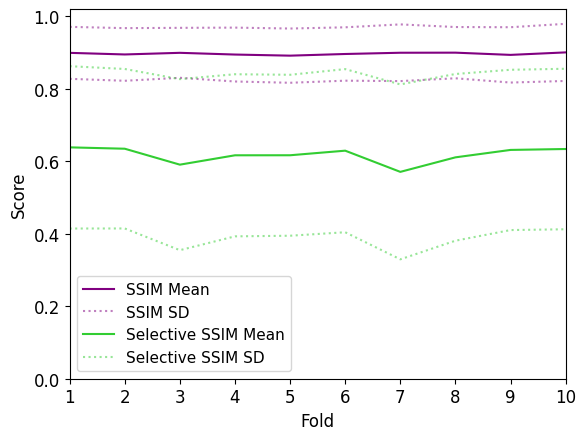

In [52]:
ssim_means = test_results_ssim_0.mean()
ssim_stds = test_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_0.mean()
sssim_stds = test_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_0.png")

In [37]:
print(ssim_means, ssim_stds)

0    0.899327
1    0.894889
2    0.899407
3    0.894639
4    0.891581
5    0.896162
6    0.899618
7    0.899847
8    0.893699
9    0.900584
dtype: float64 0    0.071706
1    0.072652
2    0.068931
3    0.074331
4    0.074849
5    0.073644
6    0.078230
7    0.070718
8    0.076347
9    0.078837
dtype: float64


In [38]:
print(sssim_means,sssim_stds)

0    0.638504
1    0.634747
2    0.590764
3    0.616606
4    0.616706
5    0.629338
6    0.570862
7    0.610932
8    0.631424
9    0.633959
dtype: float64 0    0.224011
1    0.220072
2    0.236006
3    0.223692
4    0.222085
5    0.225108
6    0.241376
7    0.230028
8    0.221182
9    0.221463
dtype: float64


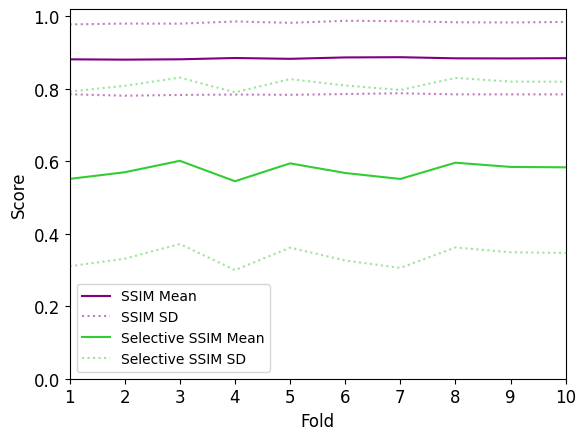

In [39]:
ssim_means = test_results_ssim_1.mean()
ssim_stds = test_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_1.mean()
sssim_stds = test_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_1.png")

In [40]:
print(ssim_means, ssim_stds)

0    0.881442
1    0.880593
2    0.881526
3    0.885087
4    0.882832
5    0.886697
6    0.887333
7    0.884191
8    0.883947
9    0.884639
dtype: float64 0    0.096381
1    0.099530
2    0.098362
3    0.100840
4    0.099336
5    0.101057
6    0.099476
7    0.099448
8    0.099232
9    0.099965
dtype: float64


In [41]:
print(sssim_means,sssim_stds)

0    0.551465
1    0.569812
2    0.601363
3    0.545034
4    0.594350
5    0.567761
6    0.551305
7    0.596153
8    0.584512
9    0.583421
dtype: float64 0    0.241004
1    0.238582
2    0.229596
3    0.245310
4    0.232560
5    0.241478
6    0.245492
7    0.233918
8    0.235557
9    0.236229
dtype: float64


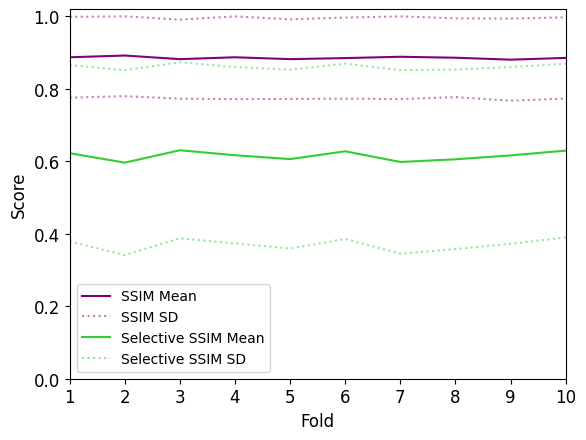

In [42]:
ssim_means = test_results_ssim_2.mean()
ssim_stds = test_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_2.mean()
sssim_stds = test_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_2.png")

In [43]:
print(ssim_means, ssim_stds)

0    0.887111
1    0.891953
2    0.881965
3    0.887128
4    0.881992
5    0.884865
6    0.888512
7    0.885865
8    0.880533
9    0.885324
dtype: float64 0    0.111517
1    0.112166
2    0.109080
3    0.115543
4    0.109864
5    0.111826
6    0.116784
7    0.108634
8    0.113230
9    0.112090
dtype: float64


In [44]:
print(sssim_means,sssim_stds)

0    0.622404
1    0.596363
2    0.630461
3    0.616751
4    0.606088
5    0.627619
6    0.598202
7    0.605547
8    0.616291
9    0.629475
dtype: float64 0    0.243358
1    0.254948
2    0.242830
3    0.243448
4    0.246741
5    0.241983
6    0.253145
7    0.247746
8    0.243944
9    0.239594
dtype: float64


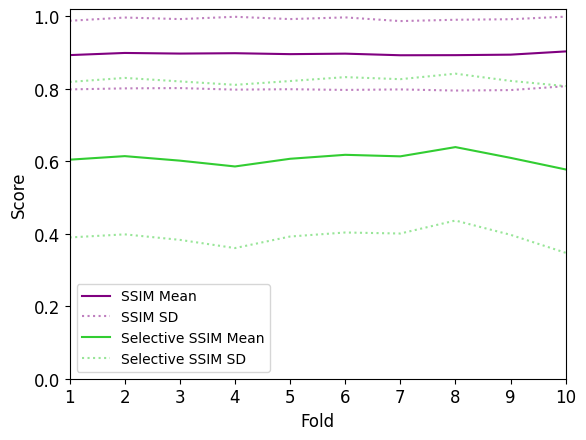

In [45]:
ssim_means = test_results_ssim_3.mean()
ssim_stds = test_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_3.mean()
sssim_stds = test_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_3.png")

In [46]:
print(ssim_means, ssim_stds)

0    0.893107
1    0.899044
2    0.897305
3    0.898322
4    0.895750
5    0.897102
6    0.892693
7    0.892961
8    0.894340
9    0.903244
dtype: float64 0    0.094665
1    0.097760
2    0.095216
3    0.100521
4    0.096777
5    0.100092
6    0.094301
7    0.097671
8    0.097766
9    0.095928
dtype: float64


In [47]:
print(sssim_means,sssim_stds)

0    0.604508
1    0.614288
2    0.601854
3    0.585795
4    0.606991
5    0.617924
6    0.613703
7    0.639208
8    0.609537
9    0.577528
dtype: float64 0    0.214615
1    0.215879
2    0.218655
3    0.225244
4    0.214546
5    0.214377
6    0.212982
7    0.202645
8    0.212394
9    0.230007
dtype: float64


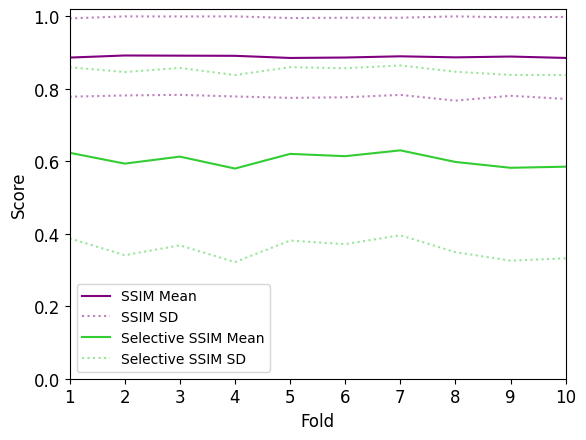

In [49]:
ssim_means = test_results_ssim_4.mean()
ssim_stds = test_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = test_results_sssim_4.mean()
sssim_stds = test_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_4.png")

In [50]:
print(ssim_means, ssim_stds)

0    0.886277
1    0.892036
2    0.891566
3    0.891138
4    0.885246
5    0.886432
6    0.889777
7    0.886894
8    0.889115
9    0.885301
dtype: float64 0    0.107987
1    0.110235
2    0.108156
3    0.112217
4    0.110166
5    0.109769
6    0.106480
7    0.119449
8    0.108228
9    0.113156
dtype: float64


In [51]:
print(sssim_means,sssim_stds)

0    0.623491
1    0.593654
2    0.612943
3    0.580019
4    0.620503
5    0.614149
6    0.630224
7    0.598251
8    0.582096
9    0.585188
dtype: float64 0    0.236090
1    0.252788
2    0.244784
3    0.258091
4    0.239243
5    0.242680
6    0.234322
7    0.248933
8    0.256256
9    0.252942
dtype: float64


### SSIM / SSSIM Comparison for all n-folds

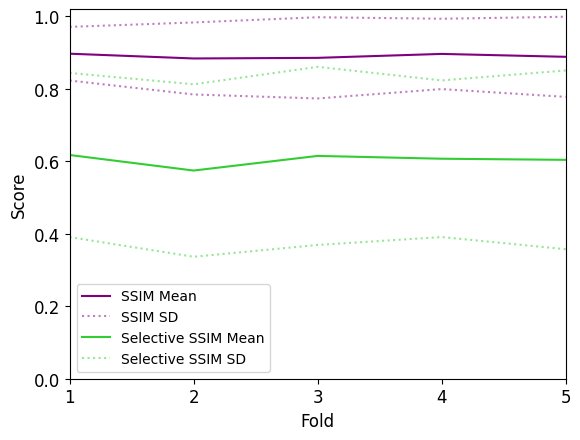

In [53]:
ssim_means_0 = test_results_ssim_0.mean()
ssim_stds_0 = test_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = test_results_ssim_1.mean()
ssim_stds_1 = test_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = test_results_ssim_2.mean()
ssim_stds_2 = test_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = test_results_ssim_3.mean()
ssim_stds_3 = test_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = test_results_ssim_4.mean()
ssim_stds_4 = test_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = test_results_sssim_0.mean()
sssim_stds_0 = test_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = test_results_sssim_1.mean()
sssim_stds_1 = test_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = test_results_sssim_2.mean()
sssim_stds_2 = test_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = test_results_sssim_3.mean()
sssim_stds_3 = test_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = test_results_sssim_4.mean()
sssim_stds_4 = test_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1



n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_mean_all_folds.png")

In [54]:
print(ssim_means, ssim_stds)

[0.8969753988948002, 0.8838287823644292, 0.8855247788695225, 0.8963866622561953, 0.8883782204997491] [0.0740246033475529, 0.0993626869645015, 0.11207340756056698, 0.09706955830548061, 0.11058431168273815]


In [55]:
print(sssim_means, sssim_stds)

[0.6173842091172695, 0.574517651769032, 0.6149201468508914, 0.6071335623671572, 0.6040518190696895] [0.22650240392925522, 0.23797258070548258, 0.24577369005119168, 0.2161343787595909, 0.24661297735940027]


### SSSIM/SSIM Comparison over all n-folds


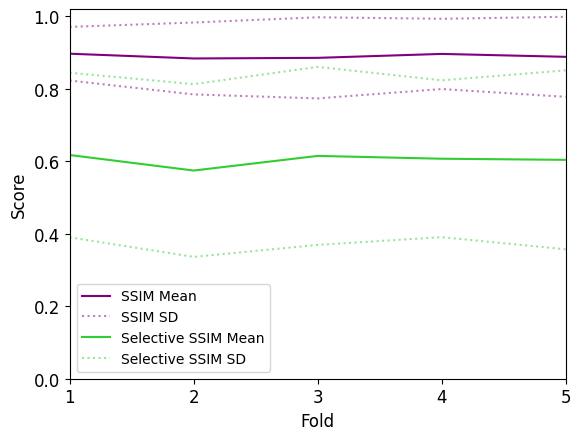

In [8]:
fold_0_test_ssim = np.array(test_results_ssim_0).reshape(-1,1)
fold_1_test_ssim = np.array(test_results_ssim_1).reshape(-1,1)
fold_2_test_ssim = np.array(test_results_ssim_2).reshape(-1,1)
fold_3_test_ssim = np.array(test_results_ssim_3).reshape(-1,1)
fold_4_test_ssim = np.array(test_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_test_ssim)
ssim_std_0 = np.std(fold_0_test_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_test_ssim)
ssim_std_1 = np.std(fold_1_test_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_test_ssim)
ssim_std_2 = np.std(fold_2_test_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_test_ssim)
ssim_std_3 = np.std(fold_3_test_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_test_ssim)
ssim_std_4 = np.std(fold_4_test_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_test_sssim = np.array(test_results_sssim_0).reshape(-1,1)
fold_1_test_sssim = np.array(test_results_sssim_1).reshape(-1,1)
fold_2_test_sssim = np.array(test_results_sssim_2).reshape(-1,1)
fold_3_test_sssim = np.array(test_results_sssim_3).reshape(-1,1)
fold_4_test_sssim = np.array(test_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_test_sssim)
sssim_std_0 = np.std(fold_0_test_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_test_sssim)
sssim_std_1 = np.std(fold_1_test_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_test_sssim)
sssim_std_2 = np.std(fold_2_test_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_test_sssim)
sssim_std_3 = np.std(fold_3_test_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_test_sssim)
sssim_std_4 = np.std(fold_4_test_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_test_mean_std_all_folds.png")

In [9]:
print(ssim_means, ssim_stds)

[0.8969753988948002, 0.8838287823644292, 0.8855247788695225, 0.8963866622561952, 0.8883782204997492] [0.07399935241107142, 0.09919513849061803, 0.11192471718073994, 0.09694843330015337, 0.1104483548868425]


In [10]:
print(sssim_means, sssim_stds)

[0.6173842091172697, 0.574517651769032, 0.6149201468508914, 0.6071335623671572, 0.6040518190696895] [0.22709470646684465, 0.23834383326654932, 0.2456266224687505, 0.21642208666254587, 0.24687425424141288]


### Stability Score Calculation

In [11]:
stability_score = 1 - 2*np.mean(sssim_stds)
print(stability_score)

0.5302553987575587


### Distribution of SSIM/SSSIM Values

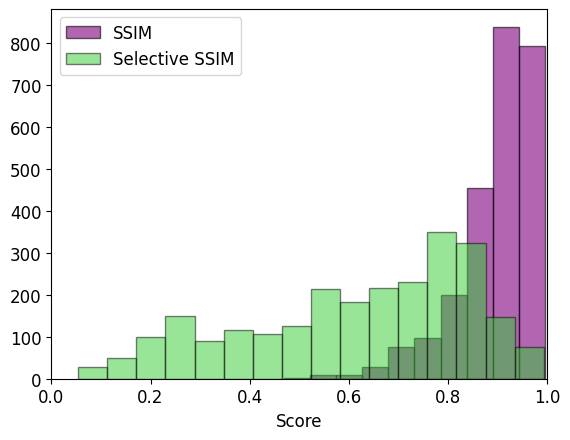

In [62]:
# n fold 0

plt.figure()
plt.hist(fold_0_test_ssim, bins=10, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_test_0.png")

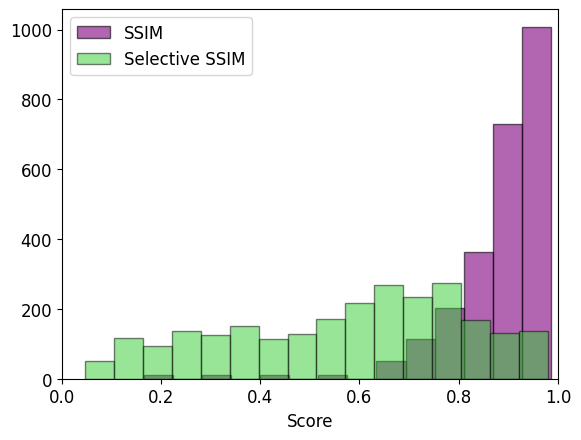

In [66]:
# n fold 1

plt.figure()
plt.hist(fold_1_test_ssim, bins=14, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_test_1.png")

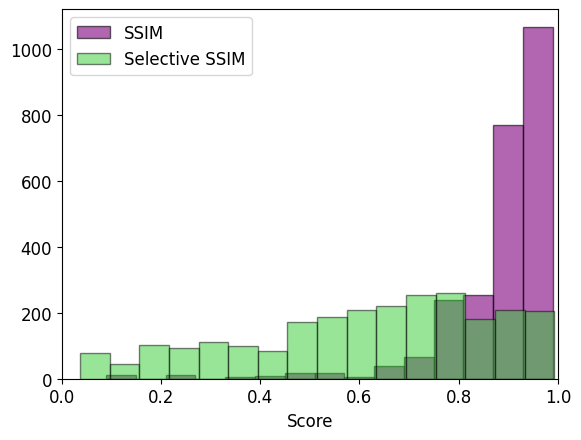

In [68]:
# n fold 2

plt.figure()
plt.hist(fold_2_test_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_test_2.png")

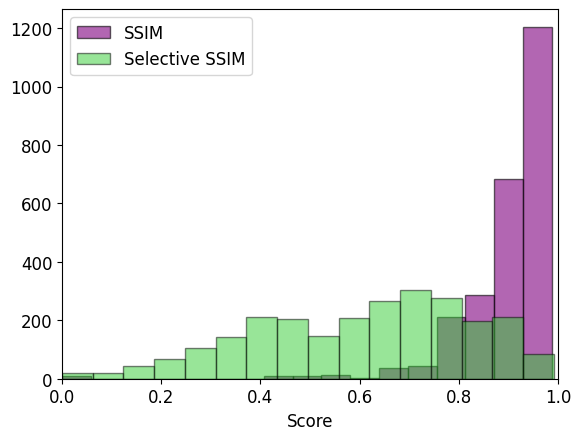

In [70]:
# n fold 3

plt.figure()
plt.hist(fold_3_test_ssim, bins=17, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_test_3.png")

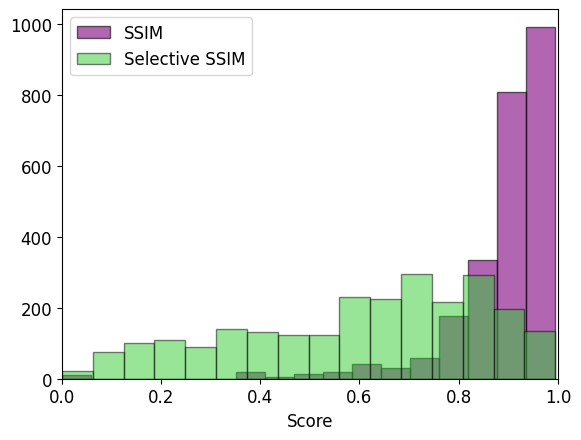

In [71]:
# n fold 4

plt.figure()
plt.hist(fold_4_test_ssim, bins=17, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_test_sssim, bins=16, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_test_4.png")

### PSNR Comparison for each n-fold

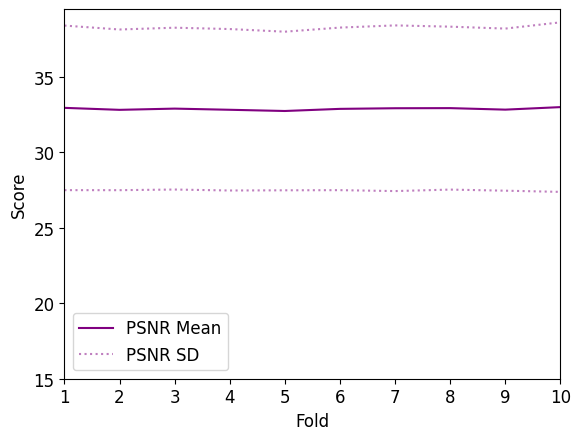

In [72]:
psnr_means = test_results_psnr_0.mean()
psnr_stds = test_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)
plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_test_0.png")

In [73]:
print(psnr_means, psnr_stds)

0    32.955242
1    32.823678
2    32.904970
3    32.827809
4    32.747025
5    32.887888
6    32.929555
7    32.937303
8    32.837202
9    33.004227
dtype: float64 0    5.454653
1    5.325825
2    5.363675
3    5.350941
4    5.257163
5    5.388248
6    5.491098
7    5.399983
8    5.372769
9    5.618999
dtype: float64


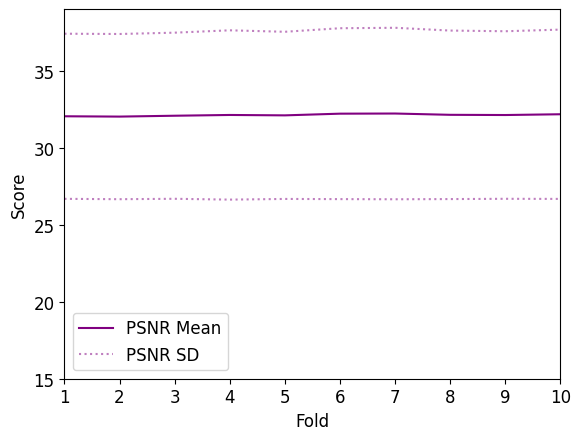

In [74]:
psnr_means = test_results_psnr_1.mean()
psnr_stds = test_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10/psnr_test_1.png")

In [75]:
print(psnr_means, psnr_stds)

0    32.042029
1    32.021099
2    32.077373
3    32.127029
4    32.101376
5    32.211030
6    32.220493
7    32.136579
8    32.123178
9    32.173397
dtype: float64 0    5.361061
1    5.363876
2    5.393512
3    5.496964
4    5.427107
5    5.548111
6    5.567654
7    5.470963
8    5.440080
9    5.496716
dtype: float64


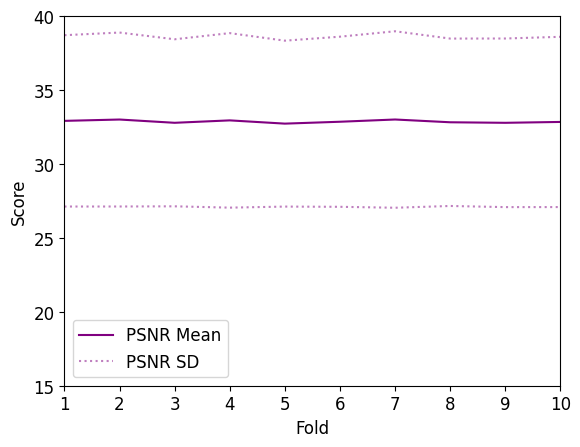

In [76]:
psnr_means = test_results_psnr_2.mean()
psnr_stds = test_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=40)
plt.savefig("unet_results_10/psnr_test_2.png")

In [77]:
print(psnr_means, psnr_stds)

0    32.915169
1    33.005757
2    32.784544
3    32.947824
4    32.728269
5    32.855748
6    33.007080
7    32.819895
8    32.783540
9    32.842580
dtype: float64 0    5.794851
1    5.883042
2    5.649373
3    5.902344
4    5.611246
5    5.753841
6    5.968618
7    5.661317
8    5.702644
9    5.758205
dtype: float64


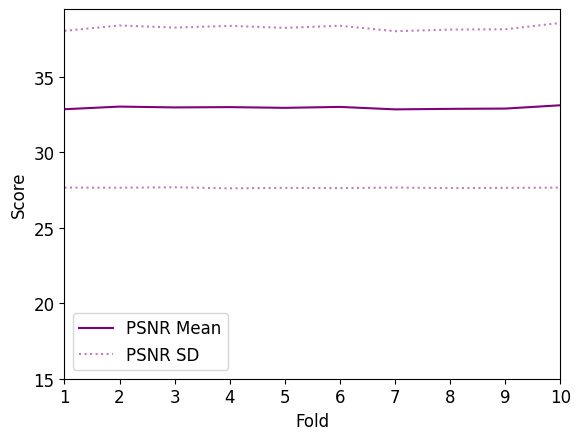

In [78]:
psnr_means = test_results_psnr_3.mean()
psnr_stds = test_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_test_3.png")

In [79]:
print(psnr_means, psnr_stds)

0    32.863978
1    33.038566
2    32.984547
3    33.004297
4    32.955770
5    33.017622
6    32.855071
7    32.889192
8    32.907721
9    33.126438
dtype: float64 0    5.195728
1    5.377031
2    5.292941
3    5.385517
4    5.301996
5    5.380894
6    5.183676
7    5.253725
8    5.256172
9    5.457864
dtype: float64


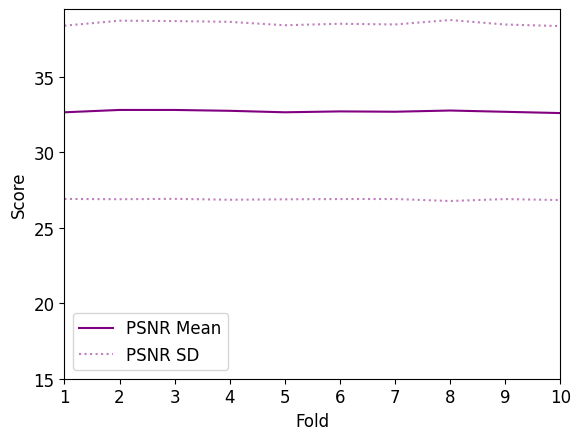

In [8]:
psnr_means = test_results_psnr_4.mean()
psnr_stds = test_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_test_4.png")

In [9]:
print(psnr_means, psnr_stds)

0    32.661010
1    32.816657
2    32.816032
3    32.759697
4    32.661567
5    32.720140
6    32.698377
7    32.778707
8    32.693772
9    32.609689
dtype: float64 0    5.742962
1    5.916798
2    5.892124
3    5.896007
4    5.769675
5    5.808917
6    5.785153
7    5.998601
8    5.784667
9    5.766642
dtype: float64


### PSNR vals for all n-folds combined

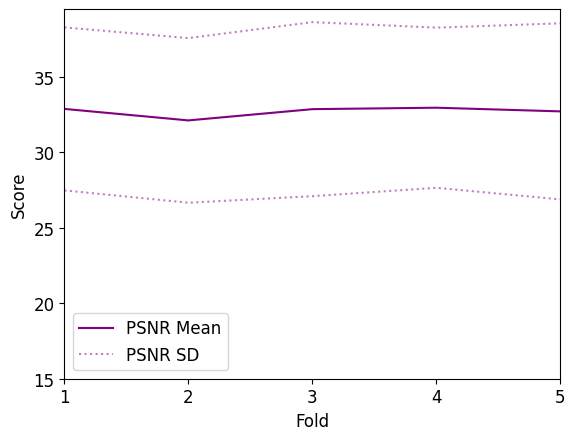

In [10]:
psnr_means_0 = test_results_psnr_0.mean()
psnr_stds_0 = test_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = test_results_psnr_1.mean()
psnr_stds_1 = test_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = test_results_psnr_2.mean()
psnr_stds_2 = test_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = test_results_psnr_3.mean()
psnr_stds_3 = test_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = test_results_psnr_4.mean()
psnr_stds_4 = test_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_test_mean_all_folds.png")

In [11]:
print(psnr_means, psnr_stds)

[32.88548986609932, 32.12335818226767, 32.869040505422646, 32.964320242553654, 32.721564840496306] [5.402335359909227, 5.456604268621731, 5.768547931727415, 5.308554601225435, 5.836154620505172]


### PSNR means and stds over all n-folds

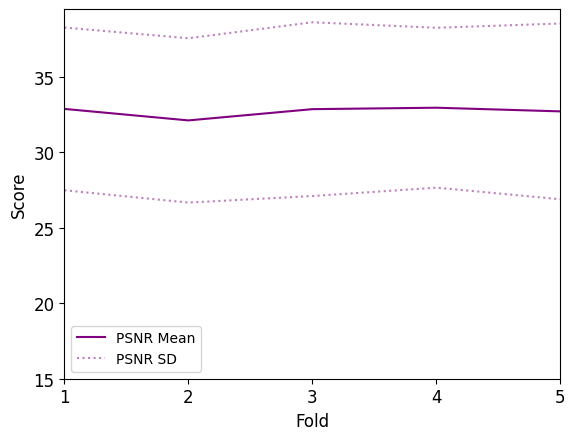

In [13]:
fold_0_test_psnr = np.array(test_results_psnr_0).reshape(-1,1)
fold_1_test_psnr = np.array(test_results_psnr_1).reshape(-1,1)
fold_2_test_psnr = np.array(test_results_psnr_2).reshape(-1,1)
fold_3_test_psnr = np.array(test_results_psnr_3).reshape(-1,1)
fold_4_test_psnr = np.array(test_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_test_psnr)
psnr_std_0 = np.std(fold_0_test_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_test_psnr)
psnr_std_1 = np.std(fold_1_test_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_test_psnr)
psnr_std_2 = np.std(fold_2_test_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_test_psnr)
psnr_std_3 = np.std(fold_3_test_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_test_psnr)
psnr_std_4 = np.std(fold_4_test_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_test_mean_std_all_folds.png")

In [14]:
print(psnr_means, psnr_stds)

[32.88548986609931, 32.12335818226767, 32.869040505422646, 32.964320242553654, 32.721564840496306] [5.392879447138811, 5.446515960285667, 5.758868690975095, 5.299288247075915, 5.8254362287356765]


### Distribution of PSNR Values

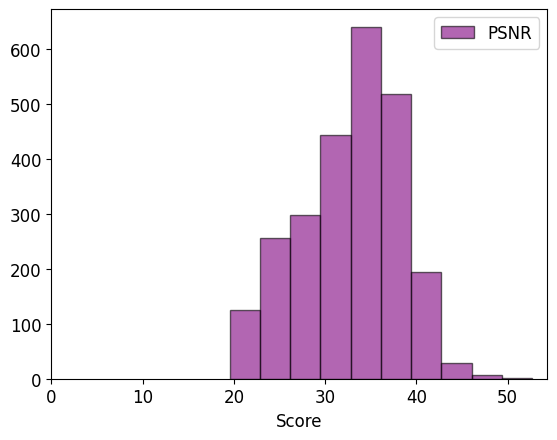

In [24]:
# n fold 0
plt.figure()
plt.hist(fold_0_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_test_0.png")

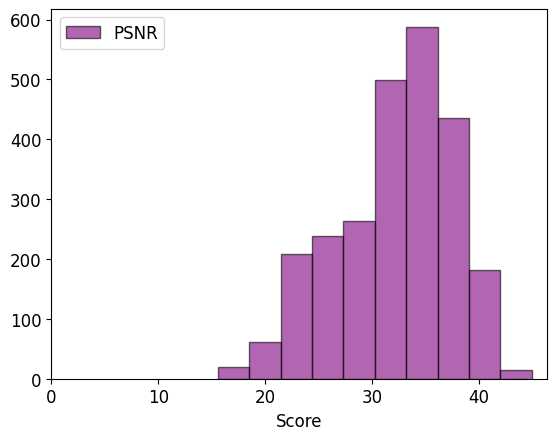

In [22]:
# n fold 1
plt.figure()
plt.hist(fold_1_test_psnr, bins=10, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_test_1.png")

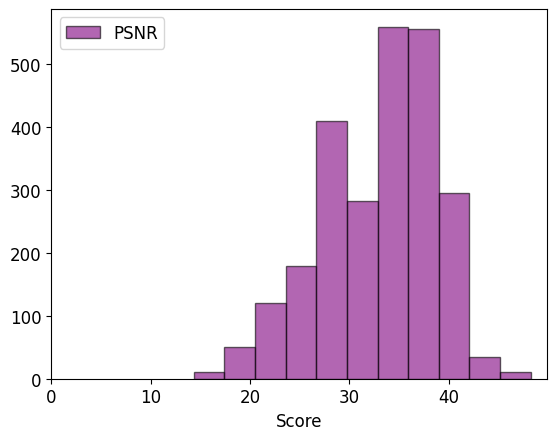

In [21]:
# n fold 2
plt.figure()
plt.hist(fold_2_test_psnr, bins=11, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_test_2.png")

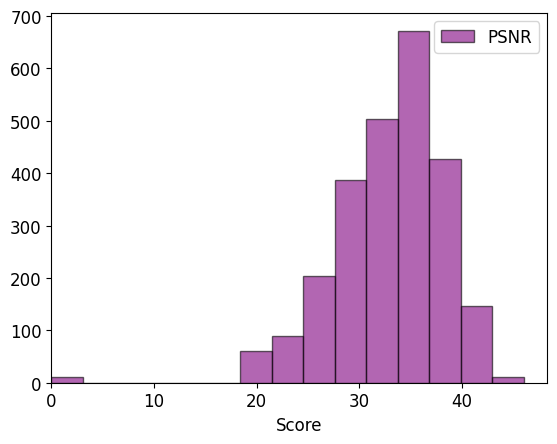

In [20]:
# n fold 3
plt.figure()
plt.hist(fold_3_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_test_3.png")

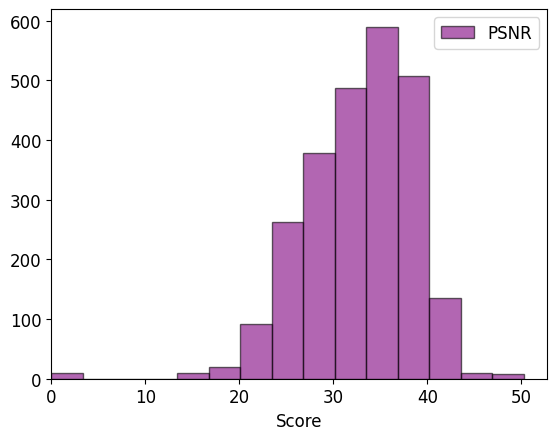

In [19]:
# n fold 4
plt.figure()
plt.hist(fold_4_test_psnr, bins=15, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_test_4.png")

## Visualize Train Set

### Results for each n-fold

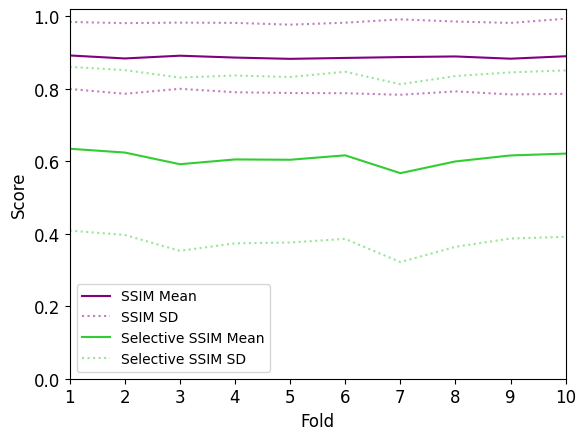

In [26]:
ssim_means = train_results_ssim_0.mean()
ssim_stds = train_results_ssim_0.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_0.mean()
sssim_stds = train_results_sssim_0.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_0.png")

In [27]:
print(ssim_means, ssim_stds)

0    0.892122
1    0.883855
2    0.891454
3    0.886299
4    0.882776
5    0.885281
6    0.887675
7    0.889384
8    0.883205
9    0.889931
dtype: float64 0    0.092535
1    0.097472
2    0.091336
3    0.095704
4    0.094324
5    0.097301
6    0.104038
7    0.096404
8    0.098671
9    0.103657
dtype: float64


In [28]:
print(sssim_means, sssim_stds)

0    0.634704
1    0.624201
2    0.591988
3    0.605170
4    0.604305
5    0.616517
6    0.567260
7    0.599673
8    0.616179
9    0.621279
dtype: float64 0    0.225945
1    0.227452
2    0.239053
3    0.231661
4    0.228354
5    0.230585
6    0.245418
7    0.235677
8    0.229253
9    0.229632
dtype: float64


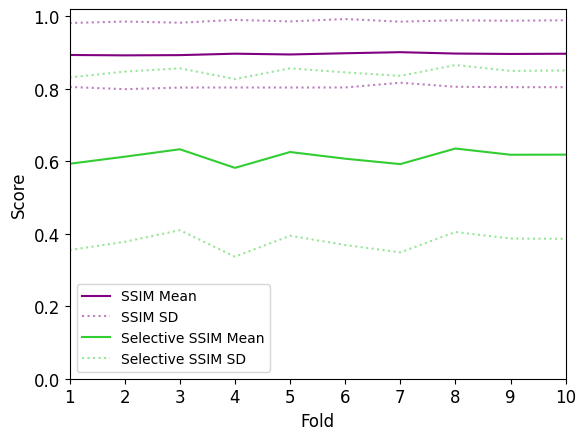

In [29]:
ssim_means = train_results_ssim_1.mean()
ssim_stds = train_results_ssim_1.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1

sssim_means = train_results_sssim_1.mean()
sssim_stds = train_results_sssim_1.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_1.png")

In [30]:
print(ssim_means, ssim_stds)

0    0.893444
1    0.892403
2    0.893045
3    0.896992
4    0.894865
5    0.898208
6    0.901164
7    0.897366
8    0.896274
9    0.896890
dtype: float64 0    0.088275
1    0.093330
2    0.089512
3    0.093279
4    0.091215
5    0.094445
6    0.084305
7    0.091749
8    0.091651
9    0.092399
dtype: float64


In [31]:
print(sssim_means, sssim_stds)

0    0.593237
1    0.612766
2    0.633250
3    0.581887
4    0.625651
5    0.607204
6    0.592288
7    0.635308
8    0.618121
9    0.618405
dtype: float64 0    0.238174
1    0.234855
2    0.223351
3    0.245150
4    0.231005
5    0.238189
6    0.243542
7    0.230403
8    0.231272
9    0.232306
dtype: float64


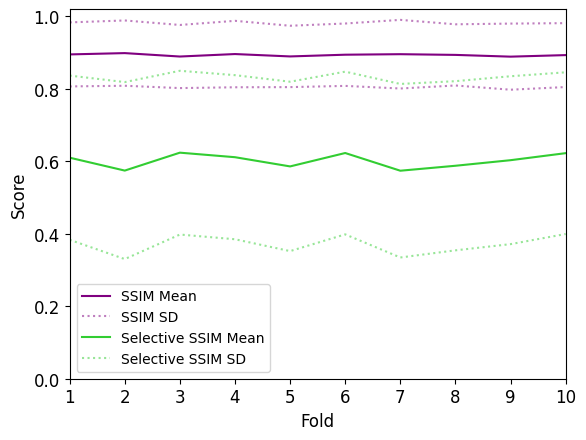

In [32]:
ssim_means = train_results_ssim_2.mean()
ssim_stds = train_results_ssim_2.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_2.mean()
sssim_stds = train_results_sssim_2.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_2.png")

In [33]:
print(sssim_means, sssim_stds)

0    0.609997
1    0.574404
2    0.623858
3    0.611328
4    0.585912
5    0.622889
6    0.574037
7    0.587716
8    0.603086
9    0.622490
dtype: float64 0    0.226587
1    0.244220
2    0.225965
3    0.226421
4    0.233730
5    0.224530
6    0.239459
7    0.233430
8    0.231672
9    0.223103
dtype: float64


In [34]:
print(ssim_means, ssim_stds)

0    0.895017
1    0.898603
2    0.889175
3    0.896007
4    0.889438
5    0.894201
6    0.895621
7    0.893682
8    0.888834
9    0.893107
dtype: float64 0    0.088339
1    0.090095
2    0.087098
3    0.091680
4    0.084679
5    0.086082
6    0.094691
7    0.084426
8    0.091235
9    0.088171
dtype: float64


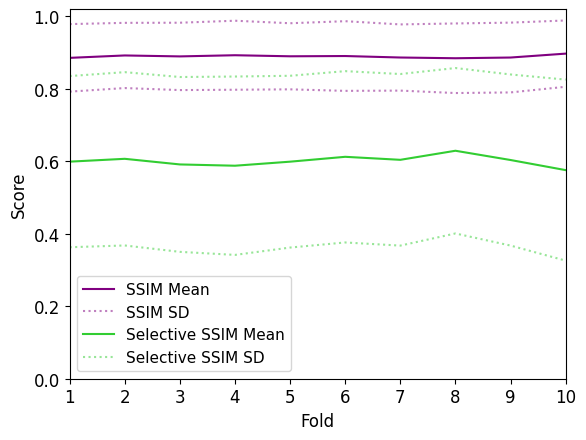

In [35]:
ssim_means = train_results_ssim_3.mean()
ssim_stds = train_results_ssim_3.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_3.mean()
sssim_stds = train_results_sssim_3.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_3.png")

In [36]:
print(ssim_means, ssim_stds)

0    0.885495
1    0.892134
2    0.889516
3    0.892746
4    0.889820
5    0.890551
6    0.886461
7    0.884433
8    0.886412
9    0.897184
dtype: float64 0    0.093178
1    0.089981
2    0.092951
3    0.095230
4    0.091199
5    0.096137
6    0.091336
7    0.096027
8    0.096308
9    0.091493
dtype: float64


In [37]:
print(sssim_means, sssim_stds)

0    0.599057
1    0.606891
2    0.591370
3    0.587833
4    0.599004
5    0.612420
6    0.604117
7    0.629136
8    0.603589
9    0.575692
dtype: float64 0    0.236185
1    0.239147
2    0.241243
3    0.246125
4    0.237018
5    0.236403
6    0.236749
7    0.228271
8    0.236102
9    0.249782
dtype: float64


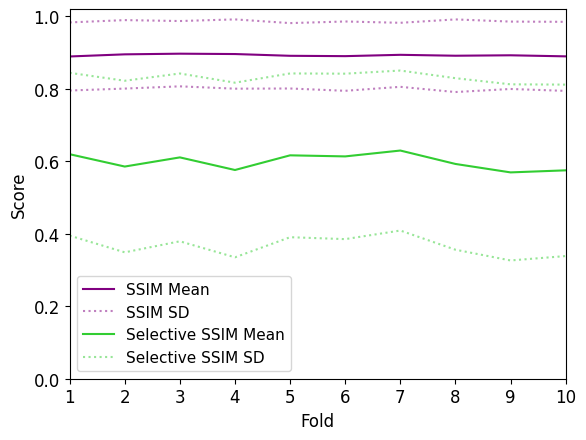

In [38]:
ssim_means = train_results_ssim_4.mean()
ssim_stds = train_results_ssim_4.std()
ssim_std_upper = ssim_means + ssim_stds
ssim_std_lower = ssim_means - ssim_stds

ssim_std_upper[ssim_std_upper > 1] = 1


sssim_means = train_results_sssim_4.mean()
sssim_stds = train_results_sssim_4.std()
sssim_std_upper = sssim_means + sssim_stds
sssim_std_lower = sssim_means - sssim_stds

sssim_std_upper[sssim_std_upper > 1] = 1


kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(kfolds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(kfolds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(kfolds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)
#plt.title("Histogram of SSIM and Selective SSIM index values")
plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_4.png")

In [39]:
print(sssim_means, sssim_stds)

0    0.619575
1    0.585565
2    0.610807
3    0.576026
4    0.616518
5    0.613550
6    0.629722
7    0.592718
8    0.569409
9    0.575081
dtype: float64 0    0.224640
1    0.236773
2    0.231553
3    0.240974
4    0.225965
5    0.228295
6    0.220752
7    0.236687
8    0.243033
9    0.236562
dtype: float64


In [40]:
print(ssim_means, ssim_stds)

0    0.889336
1    0.895203
2    0.897017
3    0.896037
4    0.891182
5    0.890239
6    0.893899
7    0.891380
8    0.892600
9    0.889657
dtype: float64 0    0.093960
1    0.094470
2    0.090115
3    0.095597
4    0.090233
5    0.095661
6    0.088344
7    0.100201
8    0.092982
9    0.095295
dtype: float64


### Results for all n-folds combined

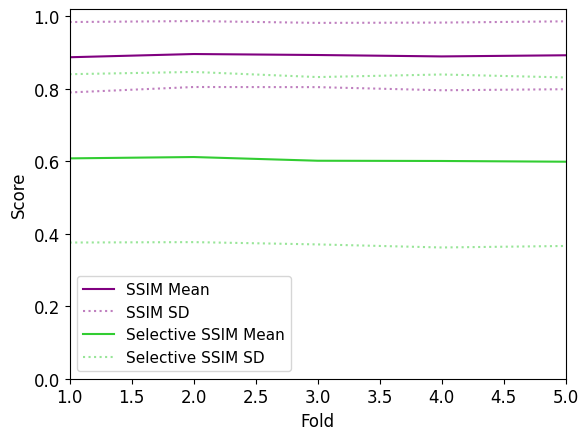

In [41]:
ssim_means_0 = train_results_ssim_0.mean()
ssim_stds_0 = train_results_ssim_0.std()
ssim_std_upper_0 = ssim_means_0 + ssim_stds_0
ssim_std_lower_0 = ssim_means_0 - ssim_stds_0
ssim_means_0 = ssim_means_0.mean()
ssim_stds_0 = ssim_stds_0.mean()
ssim_std_upper_0 = ssim_std_upper_0.mean()
ssim_std_lower_0 = ssim_std_lower_0.mean()

ssim_means_1 = train_results_ssim_1.mean()
ssim_stds_1 = train_results_ssim_1.std()
ssim_std_upper_1 = ssim_means_1 + ssim_stds_1
ssim_std_lower_1 = ssim_means_1 - ssim_stds_1
ssim_means_1 = ssim_means_1.mean()
ssim_stds_1 = ssim_stds_1.mean()
ssim_std_upper_1 = ssim_std_upper_1.mean()
ssim_std_lower_1 = ssim_std_lower_1.mean()

ssim_means_2 = train_results_ssim_2.mean()
ssim_stds_2 = train_results_ssim_2.std()
ssim_std_upper_2 = ssim_means_2 + ssim_stds_2
ssim_std_lower_2 = ssim_means_2 - ssim_stds_2
ssim_means_2 = ssim_means_2.mean()
ssim_stds_2 = ssim_stds_2.mean()
ssim_std_upper_2 = ssim_std_upper_2.mean()
ssim_std_lower_2 = ssim_std_lower_2.mean()

ssim_means_3 = train_results_ssim_3.mean()
ssim_stds_3 = train_results_ssim_3.std()
ssim_std_upper_3 = ssim_means_3 + ssim_stds_3
ssim_std_lower_3 = ssim_means_3 - ssim_stds_3
ssim_means_3 = ssim_means_3.mean()
ssim_stds_3 = ssim_stds_3.mean()
ssim_std_upper_3 = ssim_std_upper_3.mean()
ssim_std_lower_3 = ssim_std_lower_3.mean()

ssim_means_4 = train_results_ssim_4.mean()
ssim_stds_4 = train_results_ssim_4.std()
ssim_std_upper_4 = ssim_means_4 + ssim_stds_4
ssim_std_lower_4 = ssim_means_4 - ssim_stds_4
ssim_means_4 = ssim_means_4.mean()
ssim_stds_4 = ssim_stds_4.mean()
ssim_std_upper_4 = ssim_std_upper_4.mean()
ssim_std_lower_4 = ssim_std_lower_4.mean()

ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_stds_0, ssim_stds_1, ssim_stds_2, ssim_stds_3, ssim_stds_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

for i in range(len(ssim_std_upper)):
    if ssim_std_upper[i] > 1:
        ssim_std_upper[i] = 1

sssim_means_0 = train_results_sssim_0.mean()
sssim_stds_0 = train_results_sssim_0.std()
sssim_std_upper_0 = sssim_means_0 + sssim_stds_0
sssim_std_lower_0 = sssim_means_0 - sssim_stds_0
sssim_means_0 = sssim_means_0.mean()
sssim_stds_0 = sssim_stds_0.mean()
sssim_std_upper_0 = sssim_std_upper_0.mean()
sssim_std_lower_0 = sssim_std_lower_0.mean()

sssim_means_1 = train_results_sssim_1.mean()
sssim_stds_1 = train_results_sssim_1.std()
sssim_std_upper_1 = sssim_means_1 + sssim_stds_1
sssim_std_lower_1 = sssim_means_1 - sssim_stds_1
sssim_means_1 = sssim_means_1.mean()
sssim_stds_1 = sssim_stds_1.mean()
sssim_std_upper_1 = sssim_std_upper_1.mean()
sssim_std_lower_1 = sssim_std_lower_1.mean()

sssim_means_2 = train_results_sssim_2.mean()
sssim_stds_2 = train_results_sssim_2.std()
sssim_std_upper_2 = sssim_means_2 + sssim_stds_2
sssim_std_lower_2 = sssim_means_2 - sssim_stds_2
sssim_means_2 = sssim_means_2.mean()
sssim_stds_2 = sssim_stds_2.mean()
sssim_std_upper_2 = sssim_std_upper_2.mean()
sssim_std_lower_2 = sssim_std_lower_2.mean()

sssim_means_3 = train_results_sssim_3.mean()
sssim_stds_3 = train_results_sssim_3.std()
sssim_std_upper_3 = sssim_means_3 + sssim_stds_3
sssim_std_lower_3 = sssim_means_3 - sssim_stds_3
sssim_means_3 = sssim_means_3.mean()
sssim_stds_3 = sssim_stds_3.mean()
sssim_std_upper_3 = sssim_std_upper_3.mean()
sssim_std_lower_3 = sssim_std_lower_3.mean()

sssim_means_4 = train_results_sssim_4.mean()
sssim_stds_4 = train_results_sssim_4.std()
sssim_std_upper_4 = sssim_means_4 + sssim_stds_4
sssim_std_lower_4 = sssim_means_4 - sssim_stds_4
sssim_means_4 = sssim_means_4.mean()
sssim_stds_4 = sssim_stds_4.mean()
sssim_std_upper_4 = sssim_std_upper_4.mean()
sssim_std_lower_4 = sssim_std_lower_4.mean()

sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_stds_0, sssim_stds_1, sssim_stds_2, sssim_stds_3, sssim_stds_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

for i in range(len(sssim_std_upper)):
    if sssim_std_upper[i] > 1:
        sssim_std_upper[i] = 1

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_mean_all_folds.png")

In [42]:
print(ssim_means, ssim_stds)

[0.8871982912658056, 0.8960651931550341, 0.8933685833288484, 0.8894752284257645, 0.8926549548719421] [0.09714425844001146, 0.09101596639786456, 0.08864970246760787, 0.09338414642644821, 0.09368564977470249]


In [43]:
print(sssim_means, sssim_stds)

[0.608127721661617, 0.6118118031297735, 0.6015718042286119, 0.6009106782722916, 0.5988968841683999] [0.23230285147320157, 0.2348246346665479, 0.23091153717514187, 0.2387024759245707, 0.23252327865940914]


### Mean and SD on all n-folds combined

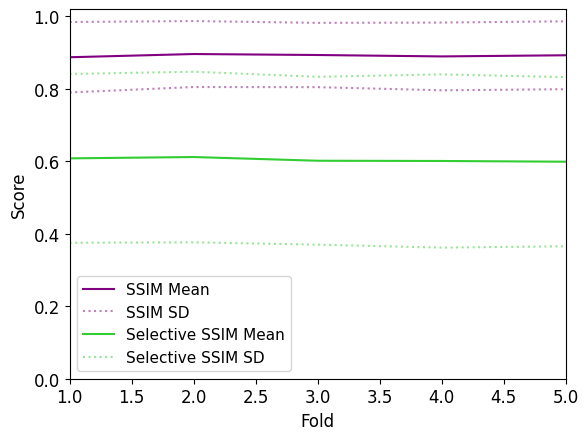

In [15]:
fold_0_train_ssim = np.array(train_results_ssim_0).reshape(-1,1)
fold_1_train_ssim = np.array(train_results_ssim_1).reshape(-1,1)
fold_2_train_ssim = np.array(train_results_ssim_2).reshape(-1,1)
fold_3_train_ssim = np.array(train_results_ssim_3).reshape(-1,1)
fold_4_train_ssim = np.array(train_results_ssim_4).reshape(-1,1)

ssim_means_0 = np.mean(fold_0_train_ssim)
ssim_std_0 = np.std(fold_0_train_ssim)
ssim_std_upper_0 = ssim_means_0 + ssim_std_0
ssim_std_lower_0 = ssim_means_0 - ssim_std_0
if ssim_std_upper_0 > 1:
    ssim_std_upper_0 = 1

ssim_means_1 = np.mean(fold_1_train_ssim)
ssim_std_1 = np.std(fold_1_train_ssim)
ssim_std_upper_1 = ssim_means_1 + ssim_std_1
ssim_std_lower_1 = ssim_means_1 - ssim_std_1
if ssim_std_upper_1 > 1:
    ssim_std_upper_1 = 1

ssim_means_2 = np.mean(fold_2_train_ssim)
ssim_std_2 = np.std(fold_2_train_ssim)
ssim_std_upper_2 = ssim_means_2 + ssim_std_2
ssim_std_lower_2 = ssim_means_2 - ssim_std_2
if ssim_std_upper_2 > 1:
    ssim_std_upper_2 = 1

ssim_means_3 = np.mean(fold_3_train_ssim)
ssim_std_3 = np.std(fold_3_train_ssim)
ssim_std_upper_3 = ssim_means_3 + ssim_std_3
ssim_std_lower_3 = ssim_means_3 - ssim_std_3
if ssim_std_upper_3 > 1:
    ssim_std_upper_3 = 1

ssim_means_4 = np.mean(fold_4_train_ssim)
ssim_std_4 = np.std(fold_4_train_ssim)
ssim_std_upper_4 = ssim_means_4 + ssim_std_4
ssim_std_lower_4 = ssim_means_4 - ssim_std_4
if ssim_std_upper_4 > 1:
    ssim_std_upper_4 = 1
    
ssim_means = [ssim_means_0, ssim_means_1, ssim_means_2, ssim_means_3, ssim_means_4]
ssim_stds = [ssim_std_0, ssim_std_1, ssim_std_2, ssim_std_3, ssim_std_4]
ssim_std_upper = [ssim_std_upper_0, ssim_std_upper_1, ssim_std_upper_2, ssim_std_upper_3, ssim_std_upper_4]
ssim_std_lower = [ssim_std_lower_0, ssim_std_lower_1, ssim_std_lower_2, ssim_std_lower_3, ssim_std_lower_4]

fold_0_train_sssim = np.array(train_results_sssim_0).reshape(-1,1)
fold_1_train_sssim = np.array(train_results_sssim_1).reshape(-1,1)
fold_2_train_sssim = np.array(train_results_sssim_2).reshape(-1,1)
fold_3_train_sssim = np.array(train_results_sssim_3).reshape(-1,1)
fold_4_train_sssim = np.array(train_results_sssim_4).reshape(-1,1)

sssim_means_0 = np.mean(fold_0_train_sssim)
sssim_std_0 = np.std(fold_0_train_sssim)
sssim_std_upper_0 = sssim_means_0 + sssim_std_0
sssim_std_lower_0 = sssim_means_0 - sssim_std_0
if sssim_std_upper_0 > 1:
    sssim_std_upper_0 = 1

sssim_means_1 = np.mean(fold_1_train_sssim)
sssim_std_1 = np.std(fold_1_train_sssim)
sssim_std_upper_1 = sssim_means_1 + sssim_std_1
sssim_std_lower_1 = sssim_means_1 - sssim_std_1
if sssim_std_upper_1 > 1:
    sssim_std_upper_1 = 1

sssim_means_2 = np.mean(fold_2_train_sssim)
sssim_std_2 = np.std(fold_2_train_sssim)
sssim_std_upper_2 = sssim_means_2 + sssim_std_2
sssim_std_lower_2 = sssim_means_2 - sssim_std_2
if sssim_std_upper_2 > 1:
    sssim_std_upper_2 = 1

sssim_means_3 = np.mean(fold_3_train_sssim)
sssim_std_3 = np.std(fold_3_train_sssim)
sssim_std_upper_3 = sssim_means_3 + sssim_std_3
sssim_std_lower_3 = sssim_means_3 - sssim_std_3
if sssim_std_upper_3 > 1:
    sssim_std_upper_3 = 1

sssim_means_4 = np.mean(fold_4_train_sssim)
sssim_std_4 = np.std(fold_4_train_sssim)
sssim_std_upper_4 = sssim_means_4 + sssim_std_4
sssim_std_lower_4 = sssim_means_4 - sssim_std_4
if sssim_std_upper_4 > 1:
    sssim_std_upper_4 = 1
    
    
sssim_means = [sssim_means_0, sssim_means_1, sssim_means_2, sssim_means_3, sssim_means_4]
sssim_stds = [sssim_std_0, sssim_std_1, sssim_std_2, sssim_std_3, sssim_std_4]
sssim_std_upper = [sssim_std_upper_0, sssim_std_upper_1, sssim_std_upper_2, sssim_std_upper_3, sssim_std_upper_4]
sssim_std_lower = [sssim_std_lower_0, sssim_std_lower_1, sssim_std_lower_2, sssim_std_lower_3, sssim_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, ssim_means, color='purple', label='SSIM Mean')
plt.plot(n_folds, ssim_std_upper, color='purple', label='SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, ssim_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.plot(n_folds, sssim_means, color='limegreen', label='Selective SSIM Mean')
plt.plot(n_folds, sssim_std_upper, color='limegreen', label='Selective SSIM SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, sssim_std_lower, color='limegreen', linestyle='dotted', alpha=0.5)


plt.legend(fontsize=11)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=0.0, ymax=1.02)
plt.savefig("unet_results_10/ssim_train_mean_std_all_folds.png")

In [16]:
print(ssim_means, ssim_stds)

[0.8871982912658057, 0.8960651931550342, 0.8933685833288483, 0.8894752284257644, 0.8926549548719421] [0.0972260829769348, 0.0910448744387559, 0.08870984582485007, 0.09343352284560241, 0.09372705043467222]


In [17]:
print(sssim_means, sssim_stds)

[0.608127721661617, 0.6118118031297735, 0.6015718042286119, 0.6009106782722916, 0.5988968841684] [0.23295352832286276, 0.2354004735248905, 0.23163110900240855, 0.2390317485389448, 0.23340669237602393]


### Distribution of SSIM/SSSIM Values

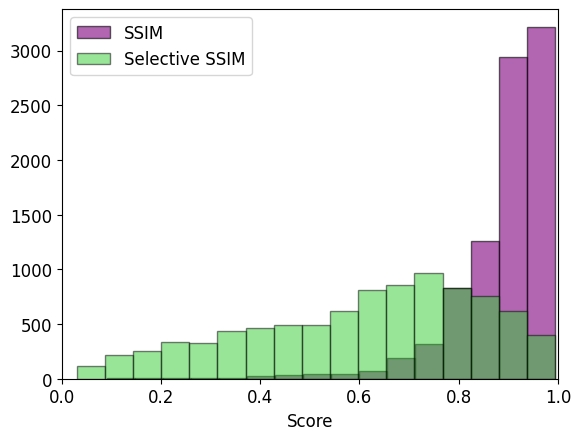

In [49]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_0_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_train_0.png")

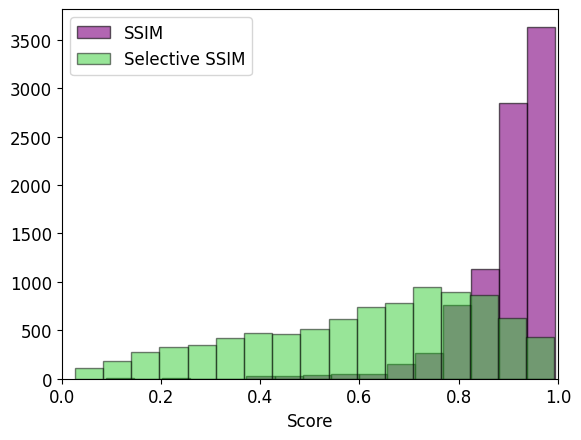

In [50]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_ssim, bins=16, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_1_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_train_1.png")

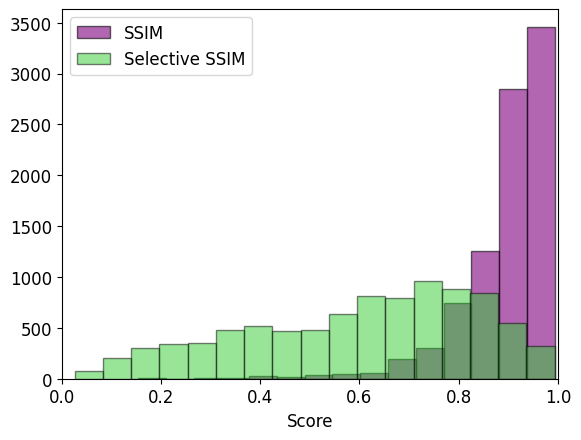

In [51]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_2_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_train_2.png")

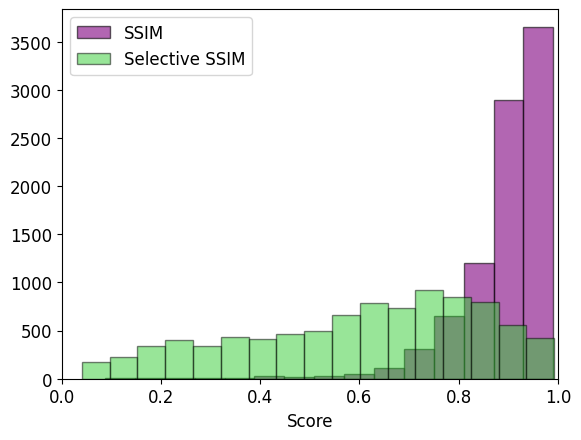

In [52]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_3_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_train_3.png")

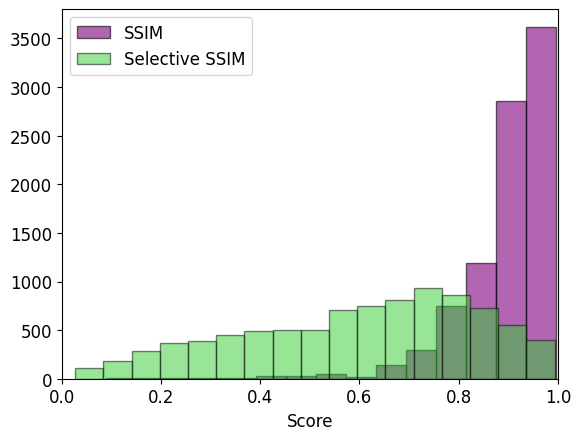

In [53]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_ssim, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(fold_4_train_sssim, bins=17, alpha=0.5, color='limegreen', edgecolor='black', label='Selective SSIM')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.savefig("unet_results_10/ssim_distribution_train_4.png")

### PSNR Results for each n-fold

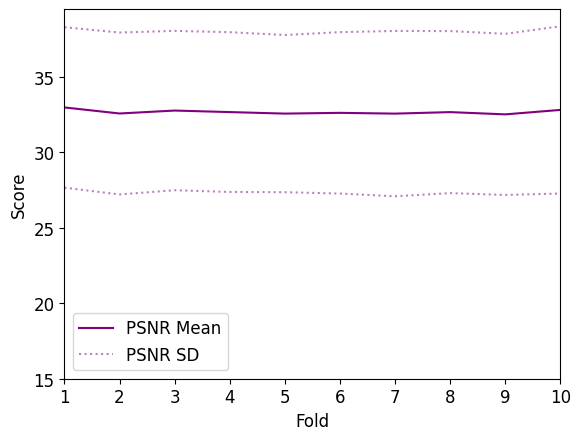

In [54]:
psnr_means = train_results_psnr_0.mean()
psnr_stds = train_results_psnr_0.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_train_0.png")

In [55]:
print(psnr_means, psnr_stds)

0    32.983270
1    32.581544
2    32.776393
3    32.675264
4    32.574160
5    32.624022
6    32.573056
7    32.672984
8    32.523323
9    32.819262
dtype: float64 0    5.317095
1    5.366955
2    5.281781
3    5.294845
4    5.210300
5    5.350540
6    5.479360
7    5.370857
8    5.339761
9    5.543000
dtype: float64


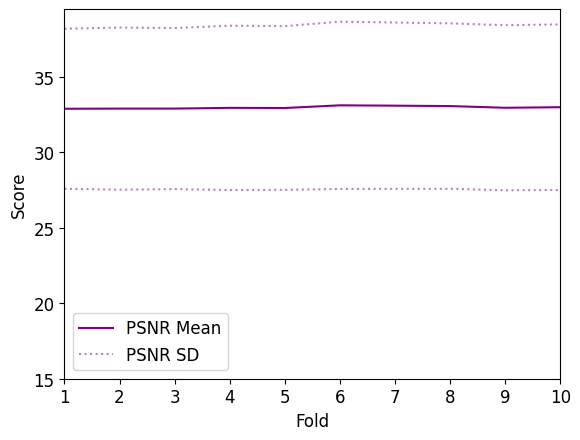

In [56]:
psnr_means = train_results_psnr_1.mean()
psnr_stds = train_results_psnr_1.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_train_1.png")

In [57]:
print(psnr_means, psnr_stds)

0    32.895789
1    32.906389
2    32.906491
3    32.954722
4    32.946211
5    33.122740
6    33.100082
7    33.073703
8    32.960998
9    32.998623
dtype: float64 0    5.302265
1    5.375092
2    5.339103
3    5.446379
4    5.424656
5    5.545242
6    5.512892
7    5.482286
8    5.471425
9    5.487897
dtype: float64


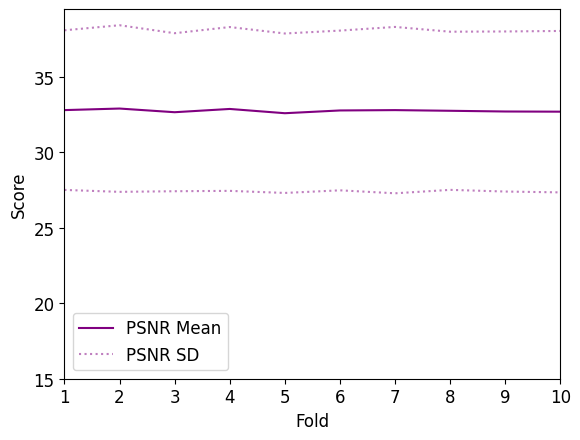

In [58]:
psnr_means = train_results_psnr_2.mean()
psnr_stds = train_results_psnr_2.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_train_2.png")

In [59]:
print(psnr_means, psnr_stds)

0    32.805948
1    32.909704
2    32.665996
3    32.882449
4    32.599760
5    32.782543
6    32.805598
7    32.761042
8    32.713707
9    32.702048
dtype: float64 0    5.290835
1    5.522302
2    5.237604
3    5.429492
4    5.284972
5    5.294436
6    5.514149
7    5.241875
8    5.305268
9    5.350194
dtype: float64


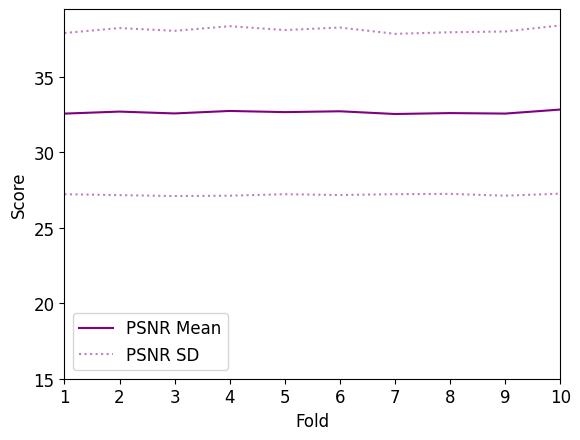

In [60]:
psnr_means = train_results_psnr_3.mean()
psnr_stds = train_results_psnr_3.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39.5)
plt.savefig("unet_results_10/psnr_train_3.png")

In [61]:
print(psnr_means, psnr_stds)

0    32.574041
1    32.707511
2    32.585302
3    32.750379
4    32.672343
5    32.728121
6    32.547439
7    32.608807
8    32.575800
9    32.843894
dtype: float64 0    5.343461
1    5.537129
2    5.476462
3    5.617253
4    5.441866
5    5.551263
6    5.312949
7    5.357053
8    5.442026
9    5.576248
dtype: float64


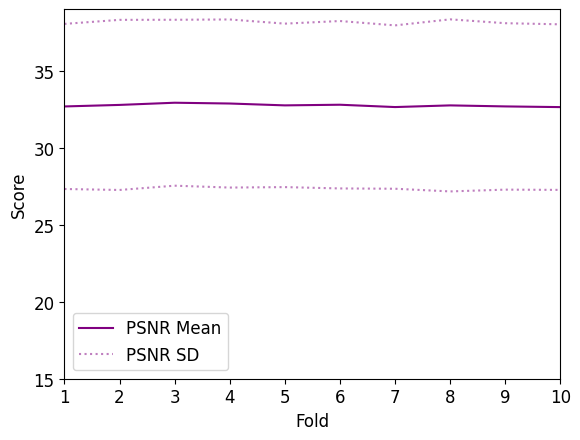

In [62]:
psnr_means = train_results_psnr_4.mean()
psnr_stds = train_results_psnr_4.std()
psnr_std_upper = psnr_means + psnr_stds
psnr_std_lower = psnr_means - psnr_stds

kfolds = np.linspace(1,10,10)

plt.figure()

plt.plot(kfolds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(kfolds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(kfolds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=10)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10/psnr_train_4.png")

In [63]:
print(psnr_means, psnr_stds)

0    32.680205
1    32.779509
2    32.921570
3    32.870590
4    32.749887
5    32.791567
6    32.640308
7    32.748914
8    32.682269
9    32.637351
dtype: float64 0    5.360398
1    5.523030
2    5.386917
3    5.457264
4    5.307386
5    5.435617
6    5.304000
7    5.586448
8    5.403714
9    5.375244
dtype: float64


### PSNR Results for all n-folds combined

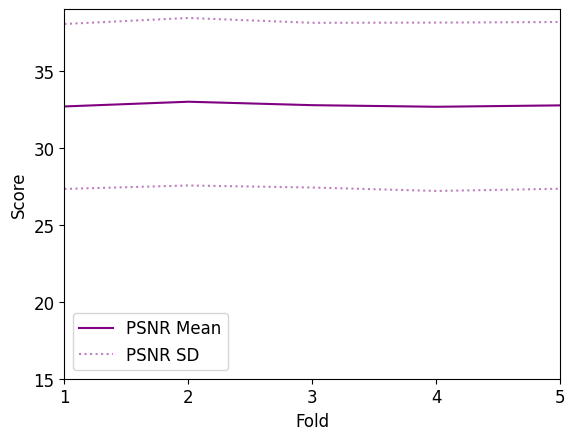

In [64]:
psnr_means_0 = train_results_psnr_0.mean()
psnr_stds_0 = train_results_psnr_0.std()
psnr_std_upper_0 = psnr_means_0 + psnr_stds_0
psnr_std_lower_0 = psnr_means_0 - psnr_stds_0
psnr_means_0 = psnr_means_0.mean()
psnr_stds_0 = psnr_stds_0.mean()
psnr_std_upper_0 = psnr_std_upper_0.mean()
psnr_std_lower_0 = psnr_std_lower_0.mean()

psnr_means_1 = train_results_psnr_1.mean()
psnr_stds_1 = train_results_psnr_1.std()
psnr_std_upper_1 = psnr_means_1 + psnr_stds_1
psnr_std_lower_1 = psnr_means_1 - psnr_stds_1
psnr_means_1 = psnr_means_1.mean()
psnr_stds_1 = psnr_stds_1.mean()
psnr_std_upper_1 = psnr_std_upper_1.mean()
psnr_std_lower_1 = psnr_std_lower_1.mean()

psnr_means_2 = train_results_psnr_2.mean()
psnr_stds_2 = train_results_psnr_2.std()
psnr_std_upper_2 = psnr_means_2 + psnr_stds_2
psnr_std_lower_2 = psnr_means_2 - psnr_stds_2
psnr_means_2 = psnr_means_2.mean()
psnr_stds_2 = psnr_stds_2.mean()
psnr_std_upper_2 = psnr_std_upper_2.mean()
psnr_std_lower_2 = psnr_std_lower_2.mean()

psnr_means_3 = train_results_psnr_3.mean()
psnr_stds_3 = train_results_psnr_3.std()
psnr_std_upper_3 = psnr_means_3 + psnr_stds_3
psnr_std_lower_3 = psnr_means_3 - psnr_stds_3
psnr_means_3 = psnr_means_3.mean()
psnr_stds_3 = psnr_stds_3.mean()
psnr_std_upper_3 = psnr_std_upper_3.mean()
psnr_std_lower_3 = psnr_std_lower_3.mean()

psnr_means_4 = train_results_psnr_4.mean()
psnr_stds_4 = train_results_psnr_4.std()
psnr_std_upper_4 = psnr_means_4 + psnr_stds_4
psnr_std_lower_4 = psnr_means_4 - psnr_stds_4
psnr_means_4 = psnr_means_4.mean()
psnr_stds_4 = psnr_stds_4.mean()
psnr_std_upper_4 = psnr_std_upper_4.mean()
psnr_std_lower_4 = psnr_std_lower_4.mean()

psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_stds_0, psnr_stds_1, psnr_stds_2, psnr_stds_3, psnr_stds_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]


n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=12)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10/psnr_train_mean_all_folds.png")

In [65]:
print(psnr_means, psnr_stds)

[32.68032792742627, 32.98657476641901, 32.76287949354861, 32.65936359973871, 32.7502168541237] [5.355449457138882, 5.438723664002794, 5.34711261593317, 5.465570885358735, 5.414001882663866]


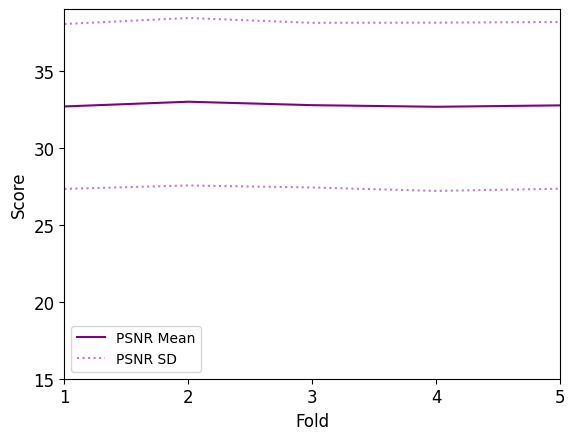

In [18]:
fold_0_train_psnr = np.array(train_results_psnr_0).reshape(-1,1)
fold_1_train_psnr = np.array(train_results_psnr_1).reshape(-1,1)
fold_2_train_psnr = np.array(train_results_psnr_2).reshape(-1,1)
fold_3_train_psnr = np.array(train_results_psnr_3).reshape(-1,1)
fold_4_train_psnr = np.array(train_results_psnr_4).reshape(-1,1)

psnr_means_0 = np.mean(fold_0_train_psnr)
psnr_std_0 = np.std(fold_0_train_psnr)
psnr_std_upper_0 = psnr_means_0 + psnr_std_0
psnr_std_lower_0 = psnr_means_0 - psnr_std_0

psnr_means_1 = np.mean(fold_1_train_psnr)
psnr_std_1 = np.std(fold_1_train_psnr)
psnr_std_upper_1 = psnr_means_1 + psnr_std_1
psnr_std_lower_1 = psnr_means_1 - psnr_std_1

psnr_means_2 = np.mean(fold_2_train_psnr)
psnr_std_2 = np.std(fold_2_train_psnr)
psnr_std_upper_2 = psnr_means_2 + psnr_std_2
psnr_std_lower_2 = psnr_means_2 - psnr_std_2

psnr_means_3 = np.mean(fold_3_train_psnr)
psnr_std_3 = np.std(fold_3_train_psnr)
psnr_std_upper_3 = psnr_means_3 + psnr_std_3
psnr_std_lower_3 = psnr_means_3 - psnr_std_3

psnr_means_4 = np.mean(fold_4_train_psnr)
psnr_std_4 = np.std(fold_4_train_psnr)
psnr_std_upper_4 = psnr_means_4 + psnr_std_4
psnr_std_lower_4 = psnr_means_4 - psnr_std_4
    
psnr_means = [psnr_means_0, psnr_means_1, psnr_means_2, psnr_means_3, psnr_means_4]
psnr_stds = [psnr_std_0, psnr_std_1, psnr_std_2, psnr_std_3, psnr_std_4]
psnr_std_upper = [psnr_std_upper_0, psnr_std_upper_1, psnr_std_upper_2, psnr_std_upper_3, psnr_std_upper_4]
psnr_std_lower = [psnr_std_lower_0, psnr_std_lower_1, psnr_std_lower_2, psnr_std_lower_3, psnr_std_lower_4]

n_folds = np.linspace(1,5,5)

plt.figure()

plt.plot(n_folds, psnr_means, color='purple', label='PSNR Mean')
plt.plot(n_folds, psnr_std_upper, color='purple', label='PSNR SD', linestyle='dotted', alpha=0.5)
plt.plot(n_folds, psnr_std_lower, color='purple', linestyle='dotted', alpha=0.5)

plt.legend(fontsize=10)
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks([1,2,3,4,5],["1","2","3","4","5"],fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=1, xmax=5)
plt.ylim(ymin=15, ymax=39)
plt.savefig("unet_results_10/psnr_train_mean_std_all_folds.png")


In [19]:
print(psnr_means, psnr_stds)

[32.68032792742627, 32.986574766419004, 32.7628794935486, 32.65936359973871, 32.7502168541237] [5.354937214927979, 5.4367951838295365, 5.345846396173368, 5.464213666718032, 5.412413203633506]


### Distribution of PSNR Values

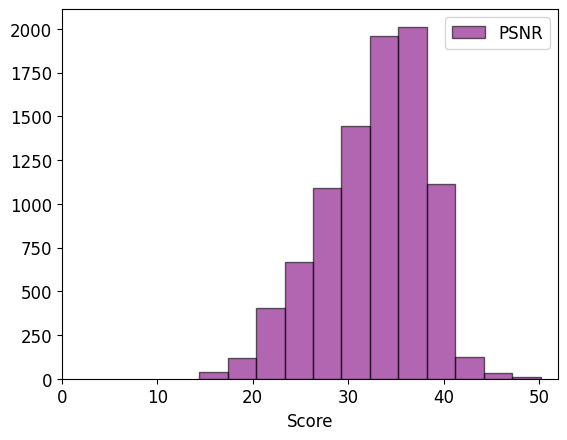

In [68]:
# n fold 0
plt.figure()
plt.hist(fold_0_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_train_0.png")

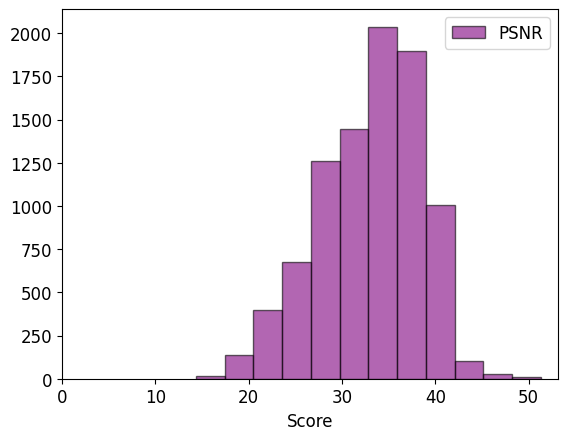

In [69]:
# n fold 1
plt.figure()
plt.hist(fold_1_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_train_1.png")

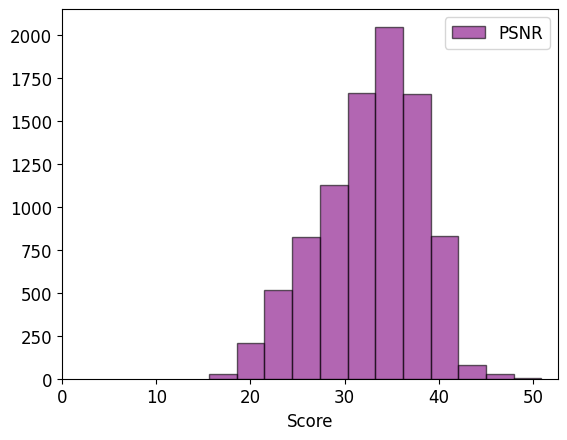

In [70]:
# n fold 2
plt.figure()
plt.hist(fold_2_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_train_2.png")

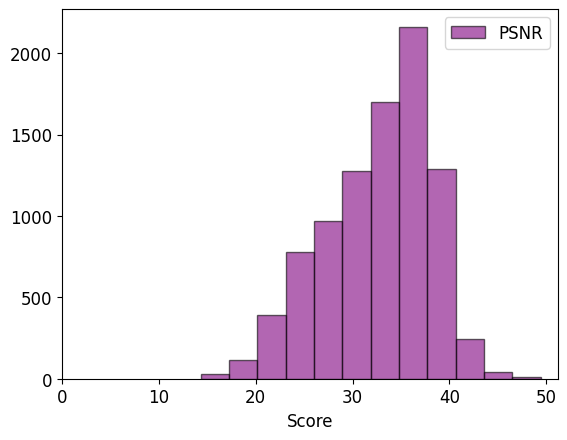

In [71]:
# n fold 3
plt.figure()
plt.hist(fold_3_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_train_3.png")

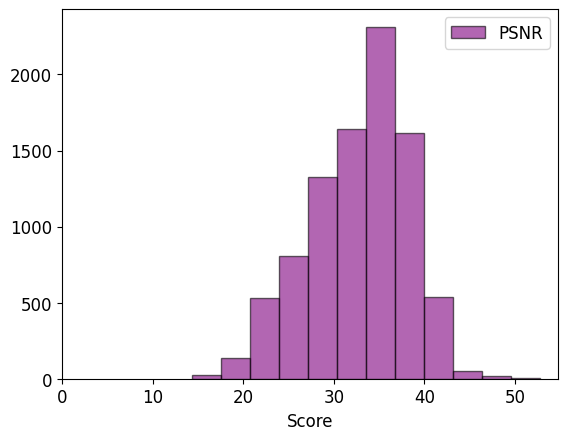

In [72]:
# n fold 4
plt.figure()
plt.hist(fold_4_train_psnr, bins=12, alpha=0.6, color='purple', edgecolor='black', label='PSNR')
#plt.title("Histogram of SSIM and Selective SSIM index values ")
plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0)
plt.savefig("unet_results_10/psnr_distribution_train_4.png")